# Linear Regressions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import make_regression
sns.set()

In [2]:
from sklearn.metrics import (
    mean_squared_error, mean_squared_log_error, mean_absolute_error, 
    r2_score, explained_variance_score, median_absolute_error
)

In [3]:
# change default figsize
plt.rcParams["figure.figsize"] = (10, 4)

## Simple Linear Regression

+ $Y = a \times x + b$
+ $h_{\theta}(X) = \theta_0 + \theta_1 \cdot x$, where $\theta$ is the dependent parameters of our model.

### Sample Data

- Linear vs. Non-linear Data
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [4]:
n_samples = 2000

(2000, 1) (2000,) 40.71064891256276


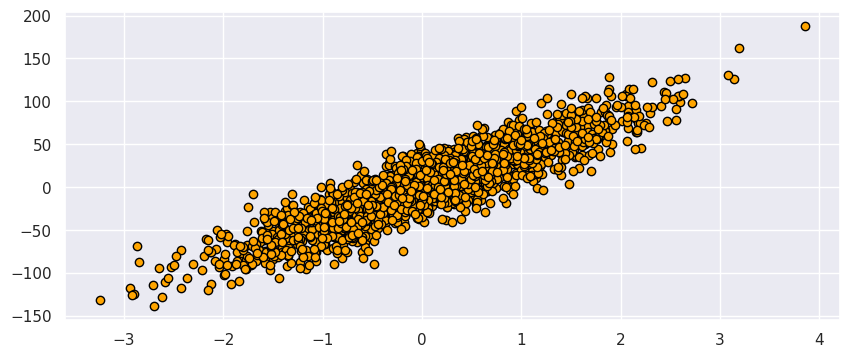

In [5]:
X1, y1, coef1 = make_regression(
    n_samples=n_samples, n_features=1, n_informative=1, noise=20, coef=True, random_state=42
)
print(X1.shape, y1.shape, coef1)

plt.plot(
    X1, y1, color='yellowgreen', linewidth=0, marker='o',  
    fillstyle='full', markerfacecolor='orange',  markeredgecolor='black'
)
plt.show()

(2000, 1) (2000,)


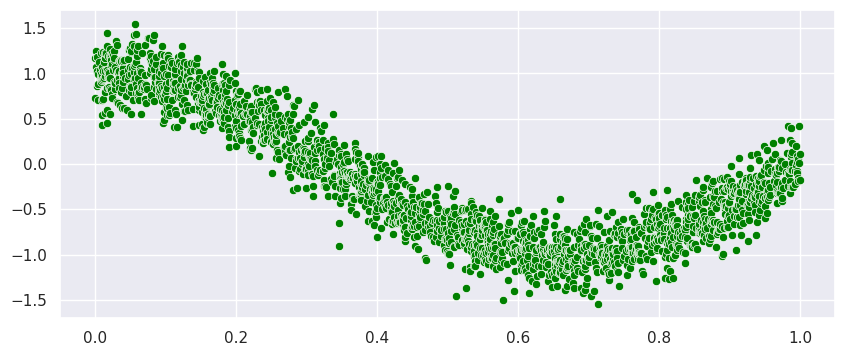

In [6]:
n_samples = 2000

# transform X by cosine and pi
def true_function(X):
     return np.cos(1.5 * np.pi * X)
    
# sort the random values from small to large
X2 = np.sort(np.random.rand(n_samples))
# add some random noises to results of true function
y2 = true_function(X2) + np.random.randn(n_samples) * 0.2
# add a new axis to X data
X2 = X2[:, np.newaxis]
# data_X_nl.max(), data_X_nl.min()
print(X2.shape, y2.shape)

sns.scatterplot(x=X2[:, 0], y=y2, color='green')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2,random_state=714)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 1), (400, 1), (1600,), (400,))

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2,random_state=714)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(1600, 1) (400, 1) (1600,) (400,)


### With scikit-learn, LinearRegression

In [9]:
lr_sk = LinearRegression()
lr_sk.fit(X_train, y_train)
print('lr_sk intercept:', lr_sk.intercept_)
print('lr_sk coefficient:', lr_sk.coef_[0])

lr_sk intercept: -0.50073504863522
lr_sk coefficient: 40.58001250979294


In [10]:
temp = r2_score(y_true=y_test, y_pred=lr_sk.predict(X_test))
# temp = lr_sk.score(X_test, y_test)
print('Base Score: ', temp)

Base Score:  0.7896149574731004


In [13]:
mean_squared_error(y_true=y_test, y_pred=lr_sk.predict(X_test))

387.19433771271446

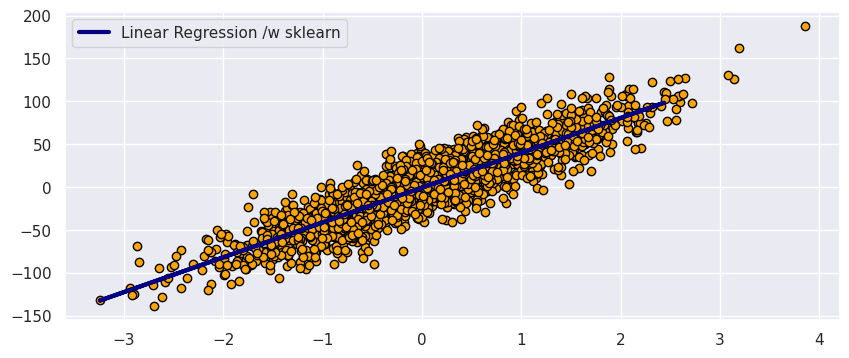

In [12]:
# plot original data agaist fitted model
plt.plot(X1, y1, color='yellowgreen', linewidth=0, marker='o', 
         fillstyle='full', markerfacecolor='orange',  markeredgecolor='black')
plt.plot(X_test, lr_sk.predict(X_test), color='navy', linewidth=3,
         label='Linear Regression /w sklearn')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [14]:
lr_sk = LinearRegression()
lr_sk.fit(X2_train, y2_train)
print('lr_sk intercept:', lr_sk.intercept_)
print('lr_sk coefficient:', lr_sk.coef_[0])

lr_sk intercept: 0.7306296407434286
lr_sk coefficient: -1.856713174716677


In [15]:
temp = r2_score(y_true=y2_test, y_pred=lr_sk.predict(X2_test))
# temp = lr_sk.score(X_test, y_test)
print('Base Score: ', temp)

Base Score:  0.571998491641631


In [16]:
mean_squared_error(y_true=y2_test, y_pred=lr_sk.predict(X2_test))

0.21035874290672452

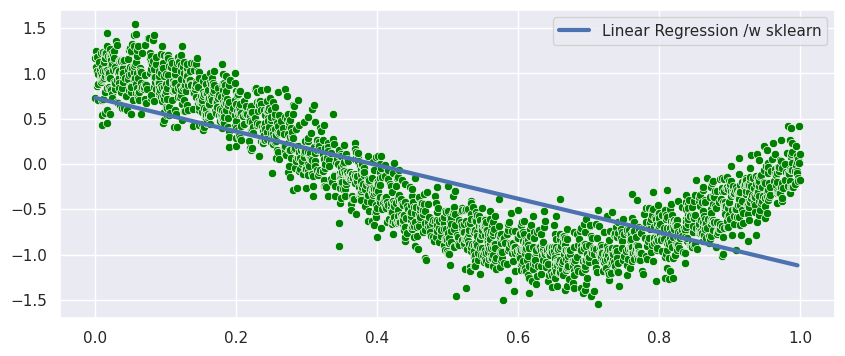

In [19]:
sns.scatterplot(x=X2[:, 0], y=y2, color='green')
sns.lineplot(x=X2_test[:, 0], y=lr_sk.predict(X2_test), linewidth=3, \
            label='Linear Regression /w sklearn')
plt.legend(loc='best')
plt.show()

### With numpy, linalg

In [21]:
X_train.shape, y_train.shape

((1600, 1), (1600,))

In [22]:
n_feature = X_train.shape[1]
# added column of ones, i.e. bias term
# X_ones = np.concatenate([X_train, np.ones((len(X_train), 1))], axis=1)
X_ones = np.c_[X_train, np.ones((len(X_train), 1))]
print(X_ones.shape)
X_ones

(1600, 2)


array([[-1.1429703 ,  1.        ],
       [ 0.19109907,  1.        ],
       [-0.00607091,  1.        ],
       ...,
       [ 1.37443809,  1.        ],
       [ 0.85639879,  1.        ],
       [-0.71682232,  1.        ]])

In [23]:
b1_np, a_np = np.linalg.lstsq(X_ones, y_train, rcond=None)[0]
print('numpy linalg intercept:', b1_np)
print('numpy linalg coefficient:', a_np)

numpy linalg intercept: 40.58001250979293
numpy linalg coefficient: -0.5007350486352226


In [24]:
temp = r2_score(y_true=y_test, y_pred=np.add(np.dot(b1_np, X_test), a_np))
print('numpy linalg score:', temp)

numpy linalg score: 0.7896149574731004


### With numpy and gradient descent

- https://www.cs.toronto.edu/~frossard/post/linear_regression/
- one **epoch** = one forward pass and one backward pass of all the training examples
- **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of **iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.


In [25]:
#adding ones to X data
X_train_ones = np.c_[X_train, np.ones((len(X_train), 1))]
X_test_ones = np.c_[X_test, np.ones((len(X_test), 1))]

In [26]:
theta = np.random.randn(2) # randomly initialized weight/theta
alpha = 0.5 # learning rate
n_iterations = 50 


#### At each iteration:  
1. compute the error/cost, i.e. the difference between current theta * X and the label y
2. using gradient descent, formula: $\theta_0 - \alpha \times \frac{1}{m} \sum{errors \times X^i}$
3. update thetas

In [27]:
# training by iterations
for iteration in range(n_iterations):
    # get current error/cost
    error = y_train.flatten() - (X_train_ones.dot(theta).flatten())
    # get current gradient 
    gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones)
    # get new theta by learning rate and gradient
    new_theta = theta - alpha * gradient
    
    # display training MSE 
    if iteration % 10 == 0:
        mse = (1.0/len(X_train_ones)) * np.sum(np.power((y_train.flatten() - X_train_ones.dot(theta).flatten()), 2))
        print("Iteration: %d - Train Error: %.4f" %(iteration, mse))
    # update theta 
    theta = new_theta
    
print('Training Finished after {} iterations'.format(n_iterations))
test_mse = (1.0/len(X_test_ones)) * np.sum(np.power((y_test.flatten() - X_test_ones.dot(theta).flatten()), 2))

print("Coefficient/Weight =",theta)
print("Test Error/Cost =", test_mse)

Iteration: 0 - Train Error: 2044.9839
Iteration: 10 - Train Error: 385.1998
Iteration: 20 - Train Error: 385.1971
Iteration: 30 - Train Error: 385.1971
Iteration: 40 - Train Error: 385.1971
Training Finished after 50 iterations
Coefficient/Weight = [40.58001251 -0.50073505]
Test Error/Cost = 387.1943377127133


In [28]:
# get prediction on test set
y_test_pred = np.matmul(X_test_ones, theta)

In [29]:
temp = r2_score(y_true=y_test, y_pred=y_test_pred)
print('numpy linalg score:', temp)

numpy linalg score: 0.789614957473101


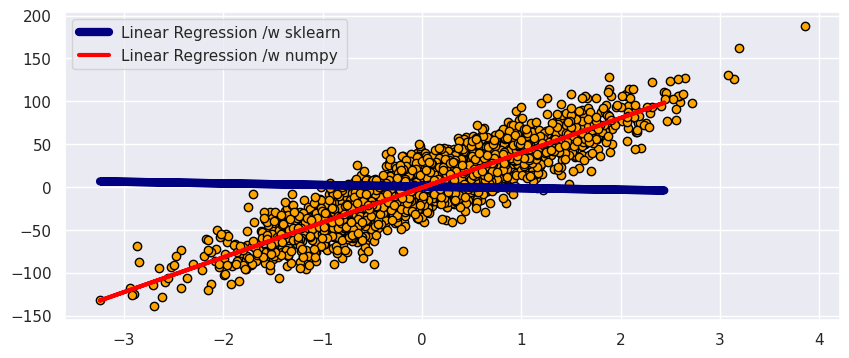

In [32]:
plt.plot(X1, y1, color='yellowgreen', linewidth=0, marker='o', 
         fillstyle='full', markerfacecolor='orange',  markeredgecolor='black')
plt.plot(X_test, lr_sk.predict(X_test), color='navy', linewidth=6, label='Linear Regression /w sklearn')
plt.plot(X_test, y_test_pred, color='red', linewidth=3, label='Linear Regression /w numpy')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# almost the same as done in sklearn

## Multiple Linear Regression